<a href="https://colab.research.google.com/github/yebiFesseha/Excel-for-Excel-in-tensorflow/blob/main/Keras_2Feature_Input_linearRegression_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Two features/Input
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
plt.style.use('dark_background')

<Axes: ylabel='Count'>

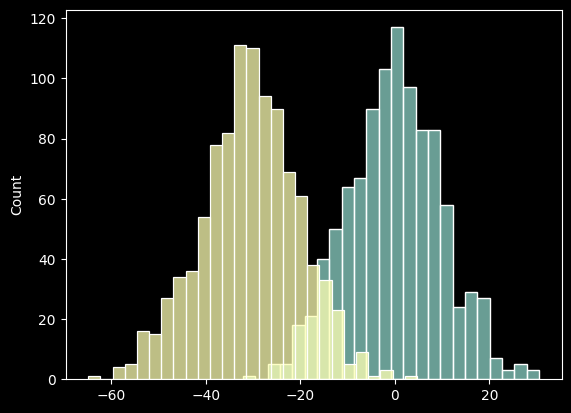

In [9]:
v = np.random.normal(0, 10, 1000)
w = np.random.normal(-30, 10, 1000)
sns.histplot(v)
sns.histplot(w)

In [10]:
# build a two features dataset using a random equation z = 19v**2 - 31w + 77

z = np.add(np.multiply(19, np.square(v)) - np.multiply(31,w),
           77)

df = pd.DataFrame({'v':v, 'w':w, 'z':z})
df.sample(3)


<Figure size 1200x500 with 0 Axes>

In [15]:
#plot z against v and w
fig = plt.figure(figsize=(12,5))
ax = Axes3D(fig)
ax.scatter(v, w, z, c=v)
plt.show()

<Figure size 1200x500 with 0 Axes>

<Figure size 2200x600 with 0 Axes>

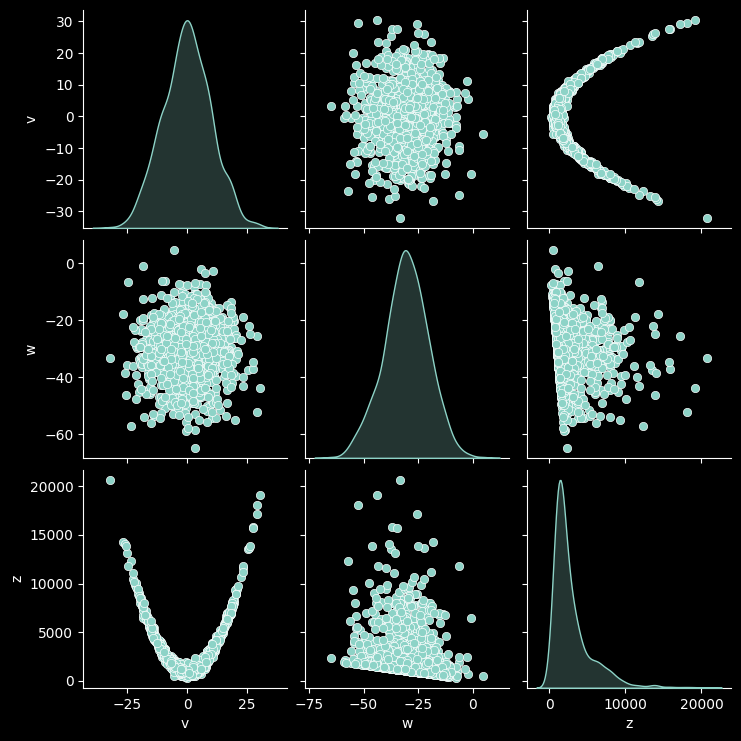

In [16]:
#check the relationship using pairplot
plt.figure(figsize=(22,6))
sns.pairplot(df, diag_kind='kde')
plt.show()

# Modelling

In [32]:
# define X and y
X = df.drop('z', axis=1)
y = df['z']

#normalize the input data using standard scaler
ss = StandardScaler()
X = ss.fit_transform(X)

X[:2]

array([[ 0.13212288, -0.96766097],
       [-0.61973453,  1.7010522 ]])

In [34]:
#train test and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((750, 2), (250, 2), (750,), (250,))

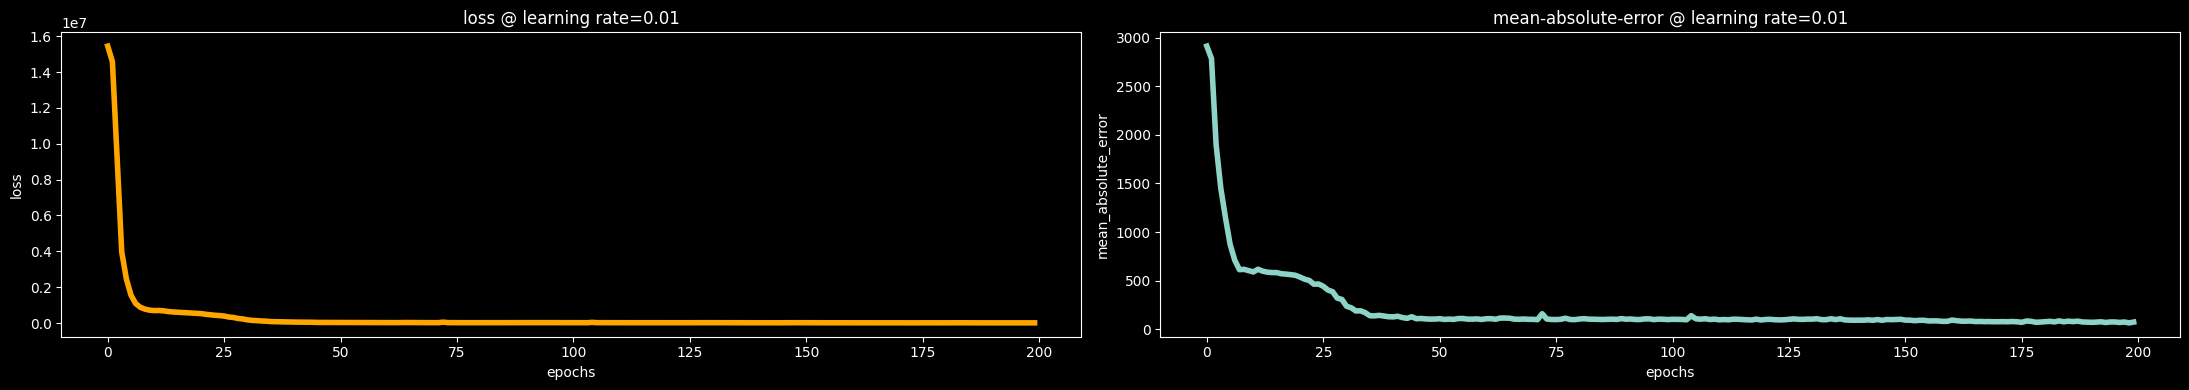

In [72]:
# model instantiate, add layers and define activation functions
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, tf.keras.activations.relu, input_dim=2))
model.add(tf.keras.layers.Dense(16, tf.keras.activations.swish))
model.add(tf.keras.layers.Dense(16, tf.keras.activations.swish))
model.add(tf.keras.layers.Dense(1, tf.keras.activations.swish))


#Compile = check for error, optimize, and get accuracy report
model.compile(
    loss = tf.keras.losses.mse,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=tf.keras.metrics.mae
)

# fit the model
history = model.fit(X, y, epochs=200, verbose=0)

#create a dataframe from loss and mse and plot them
hist = pd.DataFrame(history.history)
hist['epochs'] = history.epoch
hist.set_index('epochs', inplace=True)

plt.figure(figsize=(22,4))

plt.subplot(1,2,1)
sns.lineplot( x=hist.index, y=hist['loss'], color='orange', linewidth=4)
plt.title('loss @ learning rate=0.01')
plt.subplot(1,2,2)
sns.lineplot(x = hist.index, y=hist['mean_absolute_error'], linewidth=4)
plt.title('mean-absolute-error @ learning rate=0.01')

plt.tight_layout()
plt.show()

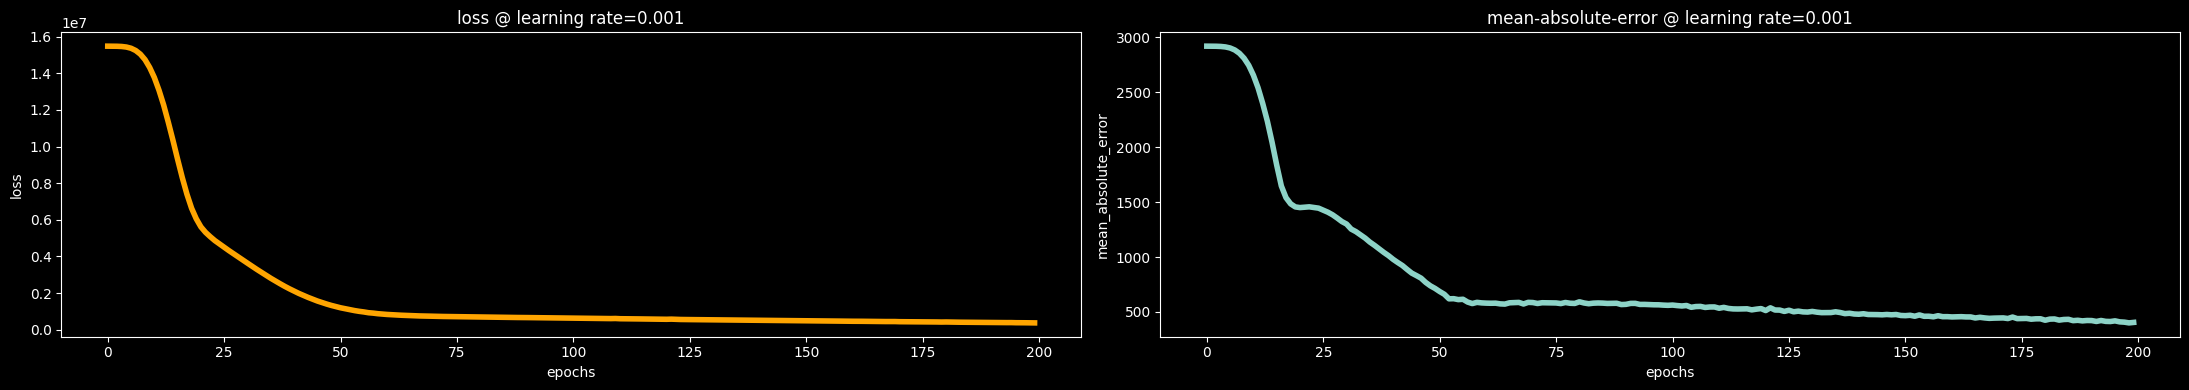

In [73]:
# model instantiate, add layers and define activation functions
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, tf.keras.activations.relu, input_dim=2))
model.add(tf.keras.layers.Dense(16, tf.keras.activations.swish))
model.add(tf.keras.layers.Dense(16, tf.keras.activations.swish))
model.add(tf.keras.layers.Dense(1, tf.keras.activations.swish))


#Compile = check for error, optimize, and get accuracy report
model.compile(
    loss = tf.keras.losses.mse,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=tf.keras.metrics.mae
)

# fit the model
history = model.fit(X, y, epochs=200, verbose=0)

#create a dataframe from loss and mse and plot them
hist = pd.DataFrame(history.history)
hist['epochs'] = history.epoch
hist.set_index('epochs', inplace=True)

plt.figure(figsize=(22,4))

plt.subplot(1,2,1)
sns.lineplot( x=hist.index, y=hist['loss'], color='orange', linewidth=4)
plt.title('loss @ learning rate=0.001')
plt.subplot(1,2,2)
sns.lineplot(x = hist.index, y=hist['mean_absolute_error'], linewidth=4)
plt.title('mean-absolute-error @ learning rate=0.001')

plt.tight_layout()
plt.show()

In [62]:
model.evaluate(X_test, y_test, verbose=0)

[242.94651794433594, 405641.53125]